In [5]:
import pandas as pd

data = pd.read_csv('/kaggle/input/heart-dataset/Heart.csv')
data.head()

,OrganisationLabel,PublishedDate,DurationFrom,DurationTo,Period,GeoEntityName,GeoName,PersonsDeathsUnder75,FemalesDeathsUnder75,MalesDeathsUnder75
0,Lincolnshire,2021-10-07T00:00:00,2017-01-01T00:00:07,2019-12-31T23:59:59,2017-2019,County,Lincolnshire,1805,595,1210
1,Lincolnshire,2021-10-07T00:00:00,2017-01-01T00:00:07,2019-12-31T23:59:59,2017-2019,District Council,Boston,185,50,135
2,Lincolnshire,2021-10-07T00:00:00,2017-01-01T00:00:07,2019-12-31T23:59:59,2017-2019,District Council,East Lindsey,490,180,315
3,Lincolnshire,2021-10-07T00:00:00,2017-01-01T00:00:07,2019-12-31T23:59:59,2017-2019,District Council,Lincoln,200,75,125
4,Lincolnshire,2021-10-07T00:00:00,2017-01-01T00:00:07,2019-12-31T23:59:59,2017-2019,District Council,North Kesteven,230,80,150


In [6]:
print(data.isnull().sum())


OrganisationLabel       0
PublishedDate           0
DurationFrom            0
DurationTo              0
Period                  0
GeoEntityName           0
GeoName                 0
PersonsDeathsUnder75    0
FemalesDeathsUnder75    0
MalesDeathsUnder75      0
dtype: int64


In [7]:
data['PublishedDate'] = pd.to_datetime(data['PublishedDate'])
data['DurationFrom'] = pd.to_datetime(data['DurationFrom'])
data['DurationTo'] = pd.to_datetime(data['DurationTo'])


##  Basic Statistical Analysis


In [8]:
print(data.describe())


             PublishedDate                   DurationFrom  \
count                   64                             64   
mean   2021-10-07 00:00:00  2013-07-02 06:00:07.000000256   
min    2021-10-07 00:00:00            2010-01-01 00:00:07   
25%    2021-10-07 00:00:00            2011-10-01 18:00:07   
50%    2021-10-07 00:00:00            2013-07-02 12:00:07   
75%    2021-10-07 00:00:00            2015-04-02 06:00:07   
max    2021-10-07 00:00:00            2017-01-01 00:00:07   
std                    NaN                            NaN   

                          DurationTo  PersonsDeathsUnder75  \
count                             64             64.000000   
mean   2016-07-01 23:59:59.000000256            748.328125   
min              2012-12-31 23:59:59            154.000000   
25%              2014-10-01 17:59:59            220.000000   
50%              2016-07-01 23:59:59            252.500000   
75%              2018-04-02 05:59:59            829.500000   
max             

## Grouping Data

In [9]:
# Group by period and calculate the sum of deaths
grouped_by_period = data.groupby('Period')[['PersonsDeathsUnder75', 'FemalesDeathsUnder75', 'MalesDeathsUnder75']].sum()
print(grouped_by_period)

# Group by GeoEntityName and calculate the sum of deaths
grouped_by_geoentity = data.groupby('GeoEntityName')[['PersonsDeathsUnder75', 'FemalesDeathsUnder75', 'MalesDeathsUnder75']].sum()
print(grouped_by_geoentity)


           PersonsDeathsUnder75  FemalesDeathsUnder75  MalesDeathsUnder75
Period                                                                   
2010-2012                 13304                  6422                6882
2011-2013                 13226                  6436                6790
2012-2014                  3383                  1087                2296
2013-2015                  3525                  1115                2415
2014-2016                  3550                  1150                2390
2015-2017                  3650                  1185                2470
2016-2018                  3650                  1200                2440
2017-2019                  3605                  1195                2425
                  PersonsDeathsUnder75  FemalesDeathsUnder75  \
GeoEntityName                                                  
County                           23947                  9888   
District Council                 23946                  9902   

   

## Advanced Visualization

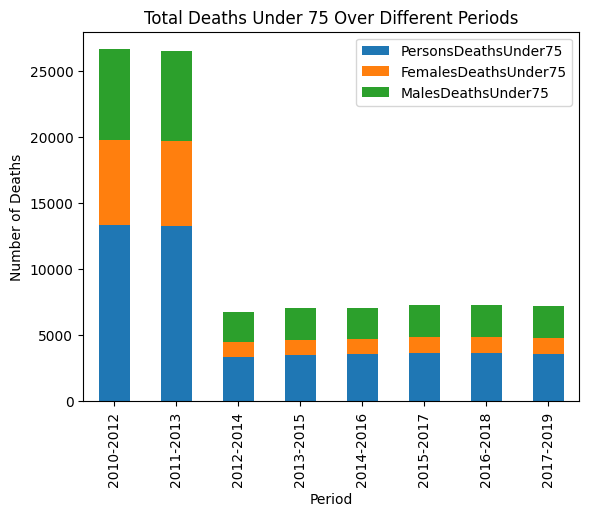

In [10]:
import matplotlib.pyplot as plt

grouped_by_period.plot(kind='bar', stacked=True)
plt.title('Total Deaths Under 75 Over Different Periods')
plt.ylabel('Number of Deaths')
plt.xlabel('Period')
plt.show()


#### Comparing Deaths by District Council

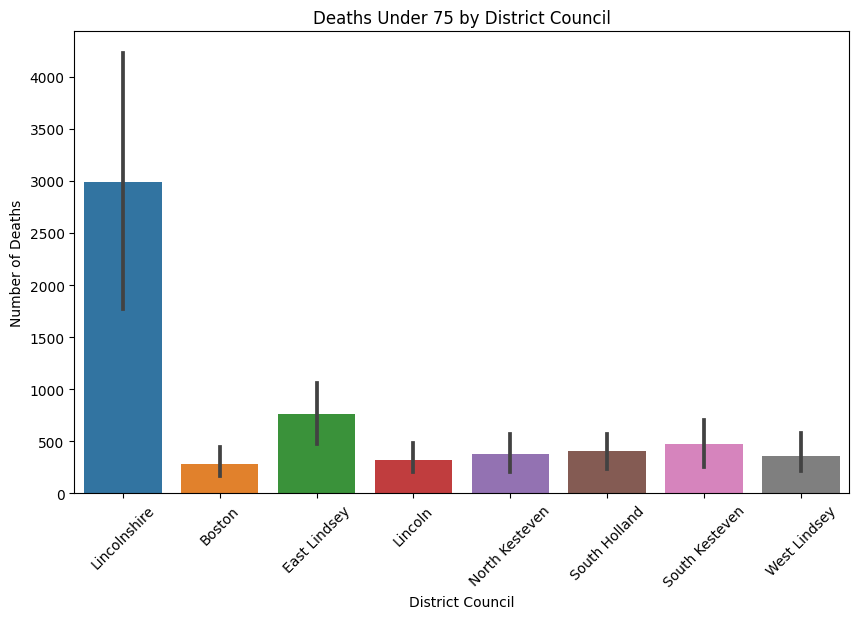

In [11]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='GeoName', y='PersonsDeathsUnder75', data=data)
plt.title('Deaths Under 75 by District Council')
plt.ylabel('Number of Deaths')
plt.xlabel('District Council')
plt.xticks(rotation=45)
plt.show()


#### Gender Comparison

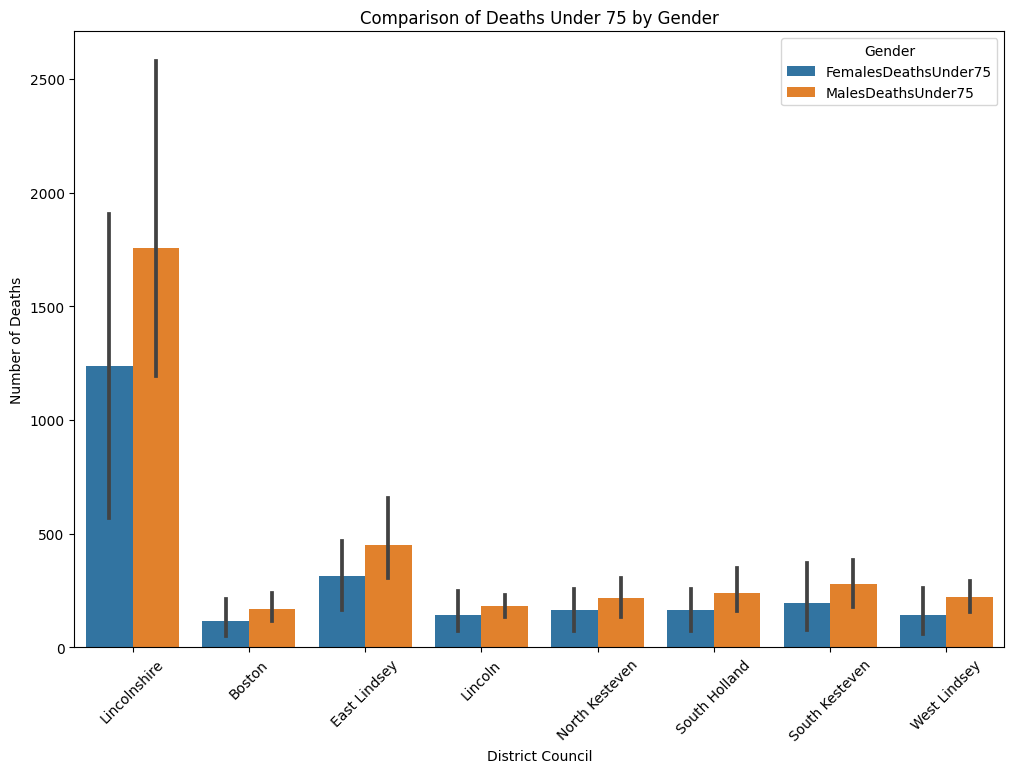

In [12]:
gender_data = data.melt(id_vars=['Period', 'GeoName'], value_vars=['FemalesDeathsUnder75', 'MalesDeathsUnder75'], var_name='Gender', value_name='Deaths')

plt.figure(figsize=(12, 8))
sns.barplot(x='GeoName', y='Deaths', hue='Gender', data=gender_data)
plt.title('Comparison of Deaths Under 75 by Gender')
plt.ylabel('Number of Deaths')
plt.xlabel('District Council')
plt.xticks(rotation=45)
plt.show()


#### Time Series Analysis

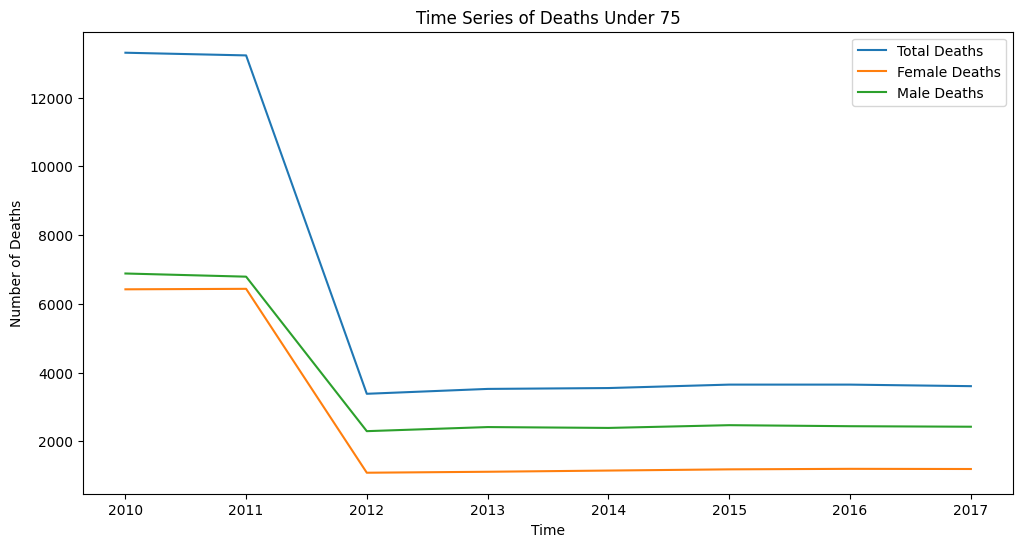

In [13]:
time_series_data = data.groupby(['DurationFrom'])[['PersonsDeathsUnder75', 'FemalesDeathsUnder75', 'MalesDeathsUnder75']].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(time_series_data['DurationFrom'], time_series_data['PersonsDeathsUnder75'], label='Total Deaths')
plt.plot(time_series_data['DurationFrom'], time_series_data['FemalesDeathsUnder75'], label='Female Deaths')
plt.plot(time_series_data['DurationFrom'], time_series_data['MalesDeathsUnder75'], label='Male Deaths')
plt.title('Time Series of Deaths Under 75')
plt.ylabel('Number of Deaths')
plt.xlabel('Time')
plt.legend()
plt.show()


#### Total Deaths Over Time by GeoEntityName

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

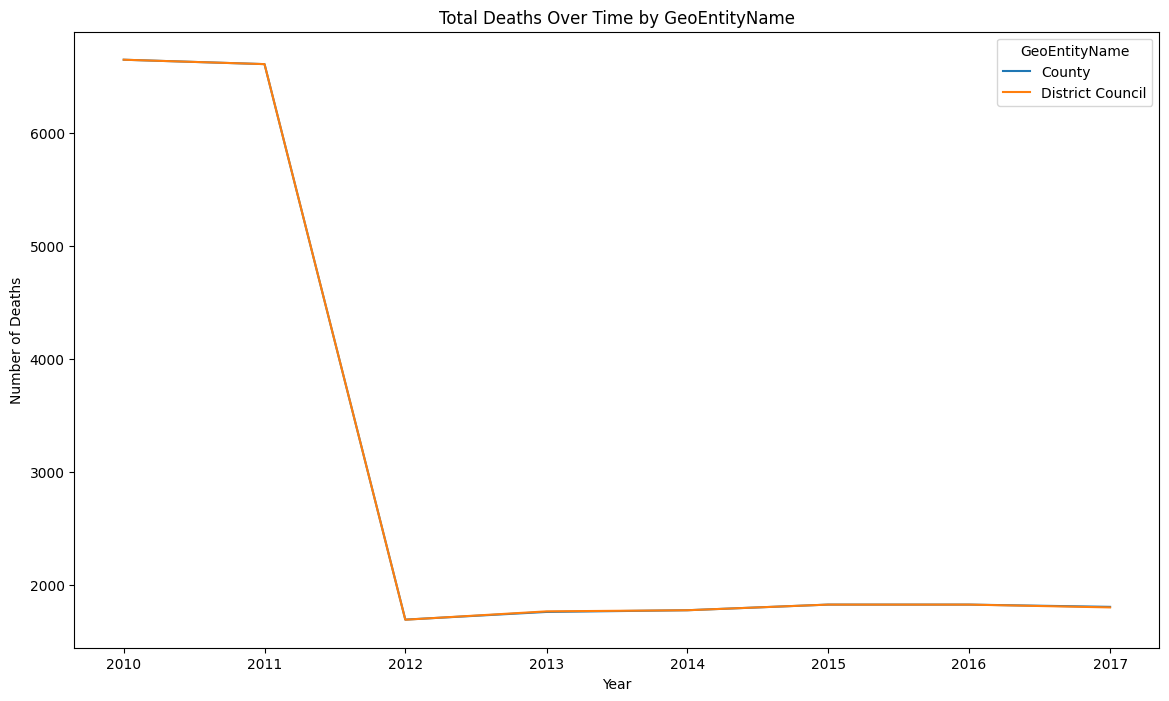

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by DurationFrom and GeoEntityName and calculate the sum of deaths
time_geo_data = data.groupby(['DurationFrom', 'GeoEntityName'])[['PersonsDeathsUnder75']].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(data=time_geo_data, x='DurationFrom', y='PersonsDeathsUnder75', hue='GeoEntityName')
plt.title('Total Deaths Over Time by GeoEntityName')
plt.ylabel('Number of Deaths')
plt.xlabel('Year')
plt.legend(title='GeoEntityName')
plt.show()


#### Heatmap of Deaths by GeoEntityName and Period

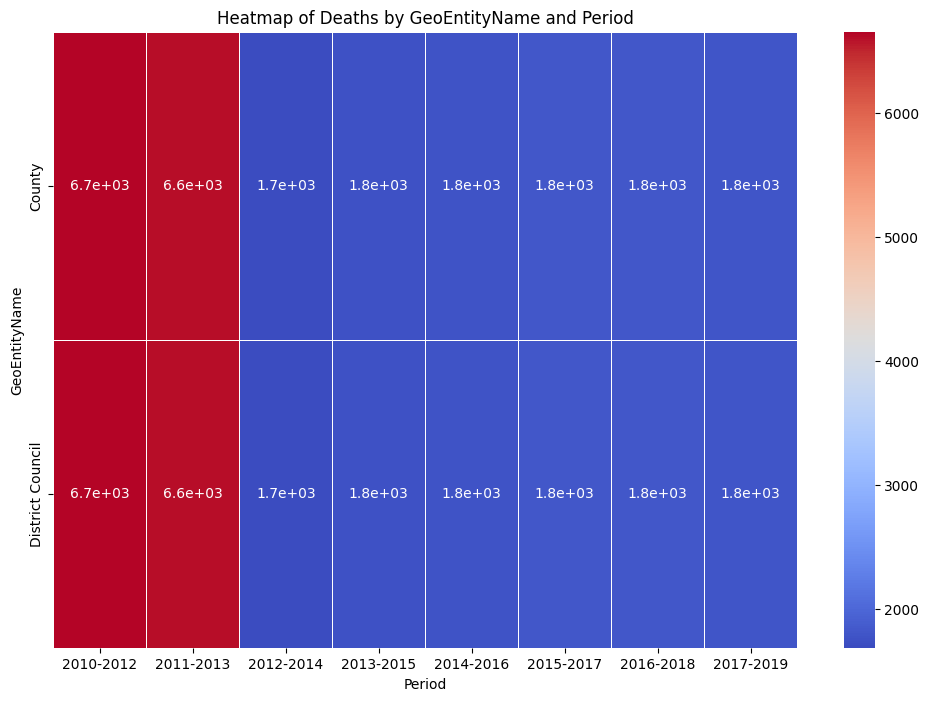

In [15]:
# Pivot the data for the heatmap
heatmap_data = data.pivot_table(index='GeoEntityName', columns='Period', values='PersonsDeathsUnder75', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Deaths by GeoEntityName and Period')
plt.ylabel('GeoEntityName')
plt.xlabel('Period')
plt.show()


#### Pie Chart of Total Deaths by Gender


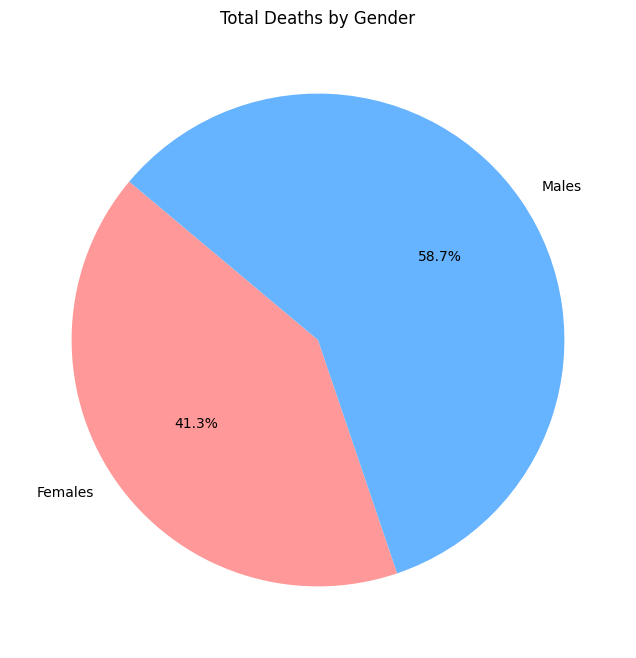

In [16]:
# Summarize deaths by gender
gender_sums = data[['FemalesDeathsUnder75', 'MalesDeathsUnder75']].sum()

plt.figure(figsize=(8, 8))
plt.pie(gender_sums, labels=['Females', 'Males'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Total Deaths by Gender')
plt.show()


#### Boxplot of Deaths by District Council

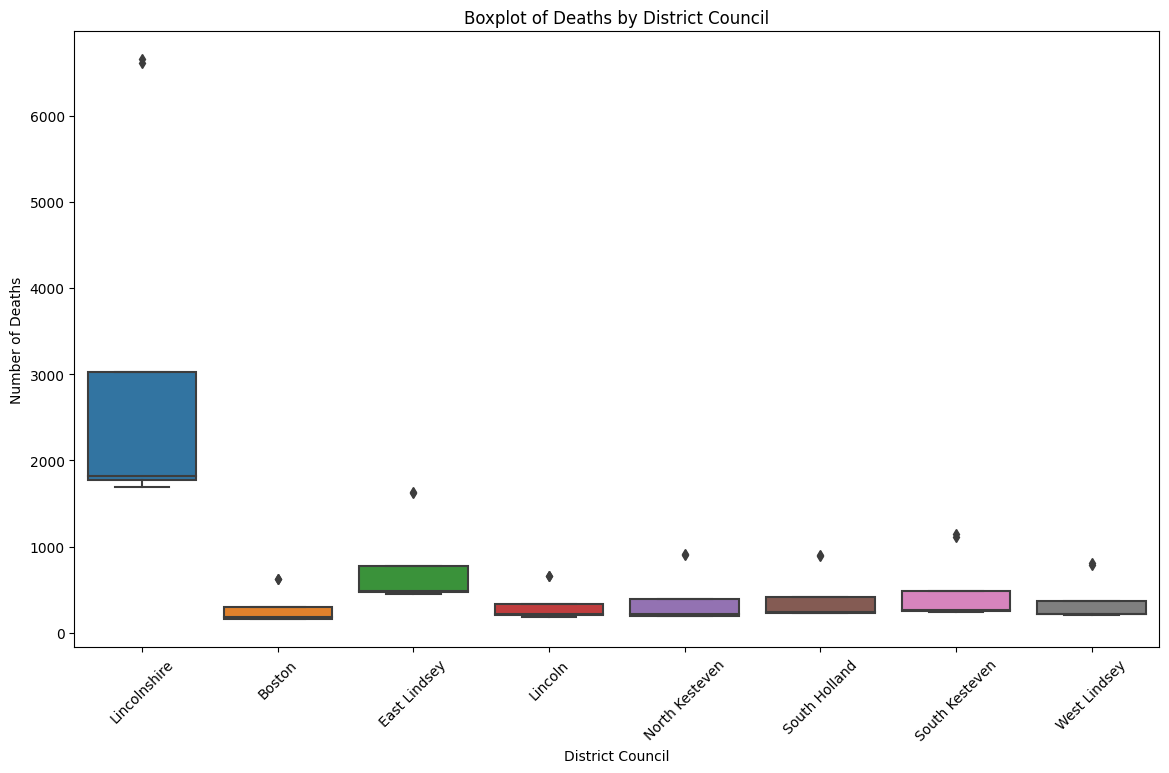

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='GeoName', y='PersonsDeathsUnder75')
plt.title('Boxplot of Deaths by District Council')
plt.ylabel('Number of Deaths')
plt.xlabel('District Council')
plt.xticks(rotation=45)
plt.show()


#### Violin Plot of Deaths by Gender and District Council

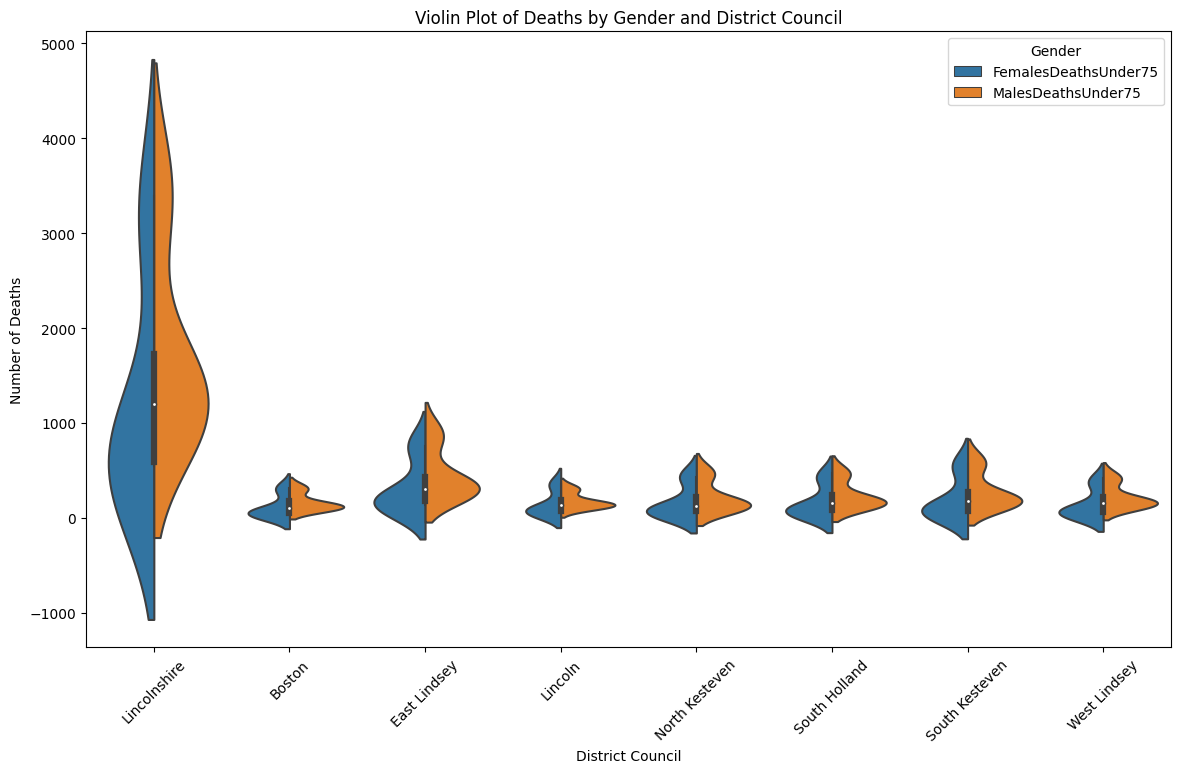

In [18]:
plt.figure(figsize=(14, 8))
sns.violinplot(data=gender_data, x='GeoName', y='Deaths', hue='Gender', split=True)
plt.title('Violin Plot of Deaths by Gender and District Council')
plt.ylabel('Number of Deaths')
plt.xlabel('District Council')
plt.xticks(rotation=45)
plt.show()


#### Bar Plot of Total Deaths by Period

/tmp/ipykernel_33/1549859506.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Period', y='PersonsDeathsUnder75', estimator=sum, ci=None)


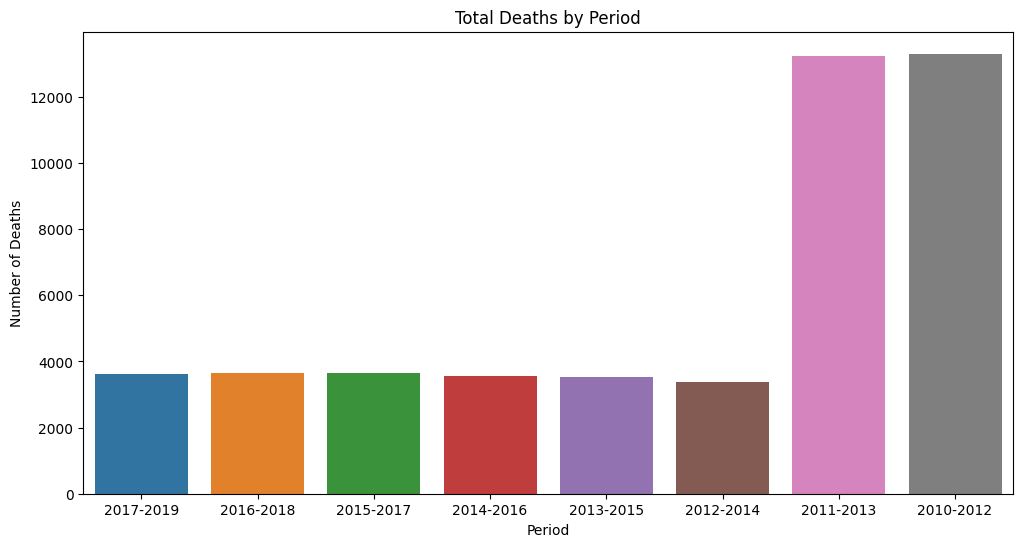

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Period', y='PersonsDeathsUnder75', estimator=sum, ci=None)
plt.title('Total Deaths by Period')
plt.ylabel('Number of Deaths')
plt.xlabel('Period')
plt.show()


#### Pair Plot of Deaths by GeoEntityName

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

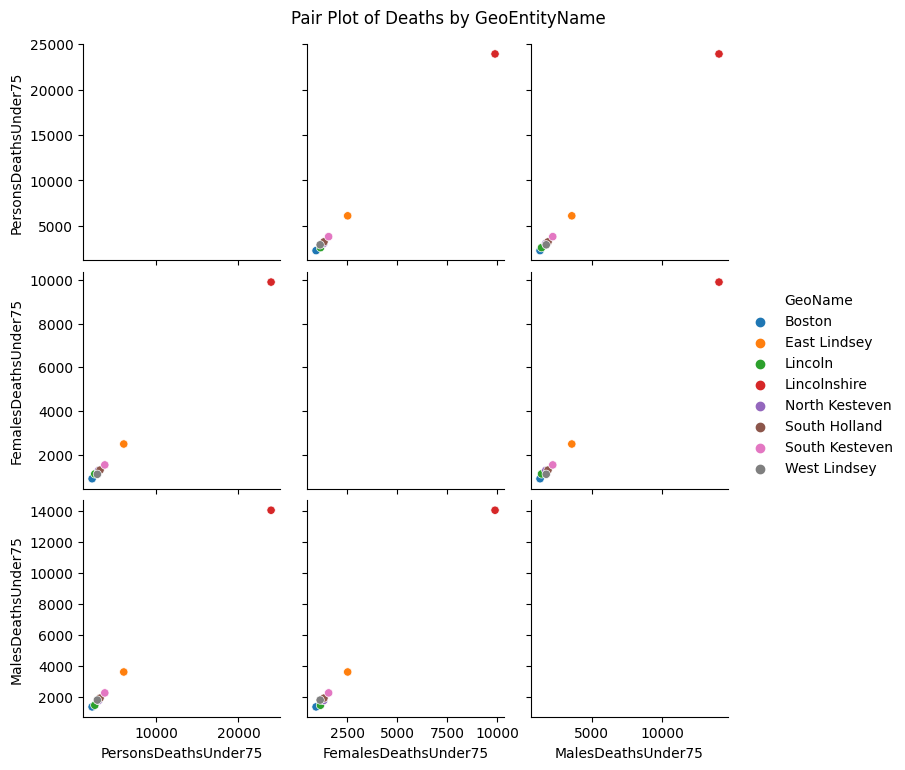

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for the pair plot
pairplot_data = data[['GeoName', 'PersonsDeathsUnder75', 'FemalesDeathsUnder75', 'MalesDeathsUnder75']]
pairplot_data = pairplot_data.groupby('GeoName').sum().reset_index()

sns.pairplot(pairplot_data, hue='GeoName', markers="o")
plt.suptitle('Pair Plot of Deaths by GeoEntityName', y=1.02)
plt.show()
